In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns

In [2]:
#Loading the data

data=pd.read_excel("Sales_Data.xlsx")
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,RECENCY,FREQUENCY,MONETARY
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,1239,1,2871.00
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,1167,1,2765.90
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,1112,1,3884.34
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,1057,1,3746.70
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,993,1,3479.76


In [3]:
data.shape

(2747, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [5]:
data.describe(include="all").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747,NaN,NaN,NaN,NaT,NaT,10259.8,91.8775,10100,10181,10264,10334.5,10425
QUANTITYORDERED,2747,NaN,NaN,NaN,NaT,NaT,35.103,9.76214,6,27,35,43,97
PRICEEACH,2747,NaN,NaN,NaN,NaT,NaT,101.099,42.0425,26.88,68.745,95.55,127.1,252.87
ORDERLINENUMBER,2747,NaN,NaN,NaN,NaT,NaT,6.49108,4.23054,1,3,6,9,18
SALES,2747,NaN,NaN,NaN,NaT,NaT,3553.05,1838.95,482.13,2204.35,3184.8,4503.09,14082.8
ORDERDATE,2747,246,2018-11-14 00:00:00,38,2018-01-06,2020-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_SINCE_LASTORDER,2747,NaN,NaN,NaN,NaT,NaT,1757.09,819.281,42,1077,1761,2436.5,3562
STATUS,2747,6,Shipped,2541,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRODUCTLINE,2747,7,Classic Cars,949,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSRP,2747,NaN,NaN,NaN,NaT,NaT,100.692,40.1148,33,68,99,124,214


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00
RECENCY,2747.0,795.085912,230.231295,412.00,608.000,754.00,982.000,1288.00
FREQUENCY,2747.0,1.000000,0.000000,1.00,1.000,1.00,1.000,1.00
MONETARY,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80


In [6]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [10]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

STATUS :  6
Disputed        14
In Process      41
On Hold         44
Resolved        47
Cancelled       60
Shipped       2541
Name: STATUS, dtype: int64


PRODUCTLINE :  7
Trains               77
Ships               230
Trucks and Buses    295
Planes              304
Motorcycles         313
Vintage Cars        579
Classic Cars        949
Name: PRODUCTLINE, dtype: int64


PRODUCTCODE :  109
S24_3969    21
S18_1749    21
S18_2248    21
S18_4409    21
S24_2887    22
            ..
S50_1392    28
S24_2840    28
S24_1444    28
S32_2509    28
S18_3232    51
Name: PRODUCTCODE, Length: 109, dtype: int64


CUSTOMERNAME :  89
Boards & Toys Co.                 3
Atelier graphique                 7
Auto-Moto Classics Inc.           8
Royale Belge                      8
Microscale Inc.                  10
                               ... 
AV Stores, Co.                   51
La Rochelle Gifts                53
Australian Collectors, Co.       55
Mini Gifts Distributors Ltd.    180
Euro Shopping Ch

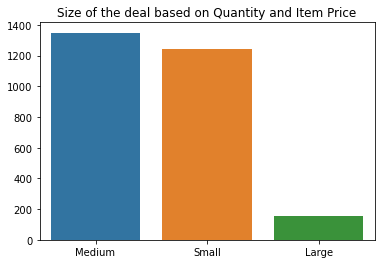

Medium    1349
Small     1246
Large      152
Name: DEALSIZE, dtype: int64


In [14]:
sns.barplot(data.DEALSIZE.value_counts().index,data.DEALSIZE.value_counts().values)
plt.title("Size of the deal based on Quantity and Item Price")
plt.show()
print(data.DEALSIZE.value_counts())

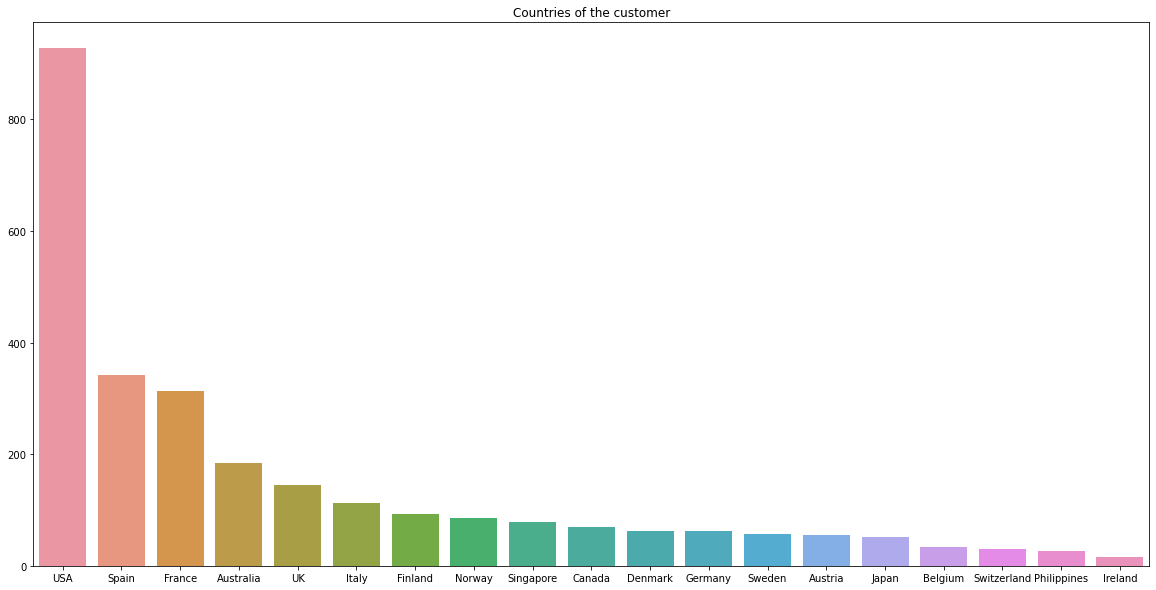

USA            928
Spain          342
France         314
Australia      185
UK             144
Italy          113
Finland         92
Norway          85
Singapore       79
Canada          70
Denmark         63
Germany         62
Sweden          57
Austria         55
Japan           52
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: COUNTRY, dtype: int64


In [16]:
plt.figure(figsize=(20,10))
sns.barplot(data.COUNTRY .value_counts().index,data.COUNTRY .value_counts().values)

plt.title("Countries of the customer")
plt.show()
print(data.COUNTRY .value_counts())

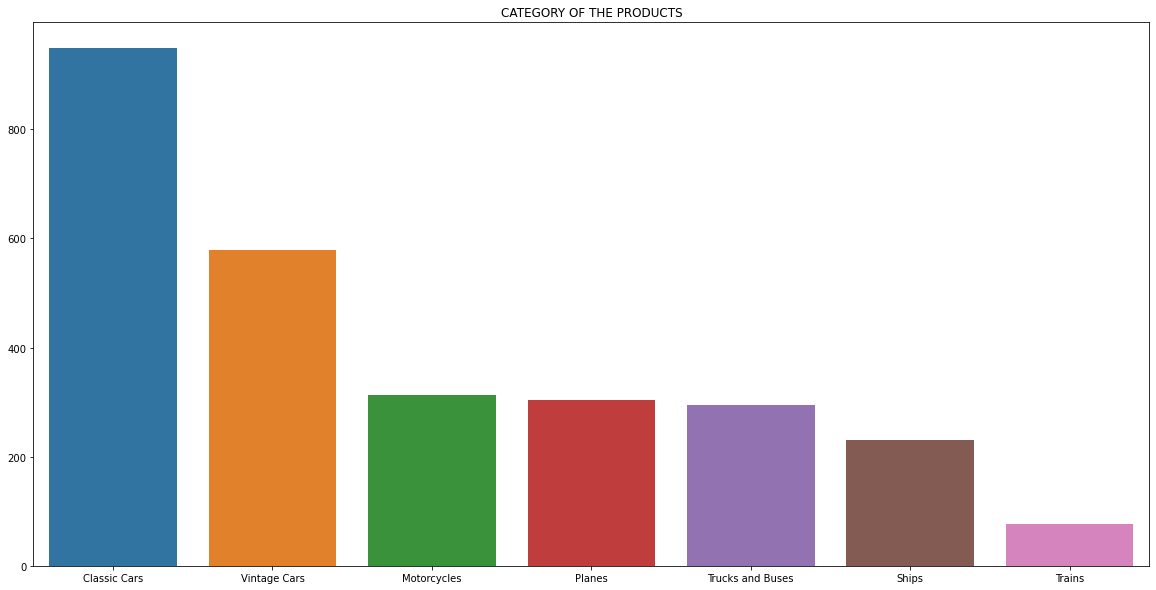

Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: PRODUCTLINE, dtype: int64


In [17]:
plt.figure(figsize=(20,10))
sns.barplot(data.PRODUCTLINE.value_counts().index,data.PRODUCTLINE.value_counts().values)

plt.title("CATEGORY OF THE PRODUCTS")
plt.show()
print(data.PRODUCTLINE.value_counts())

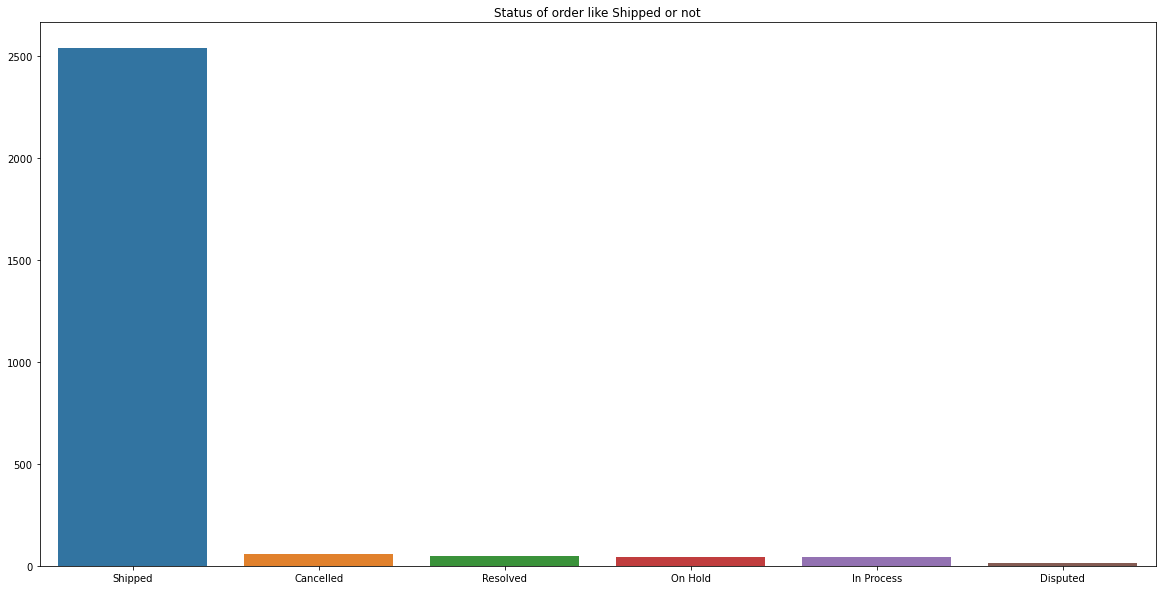

Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64


In [18]:
plt.figure(figsize=(20,10))
sns.barplot(data.STATUS.value_counts().index,data.STATUS.value_counts().values)
plt.title("Status of order like Shipped or not")
plt.show()
print(data.STATUS.value_counts())

Text(0.5, 1.0, 'PRODUCTLINE VS SALES')

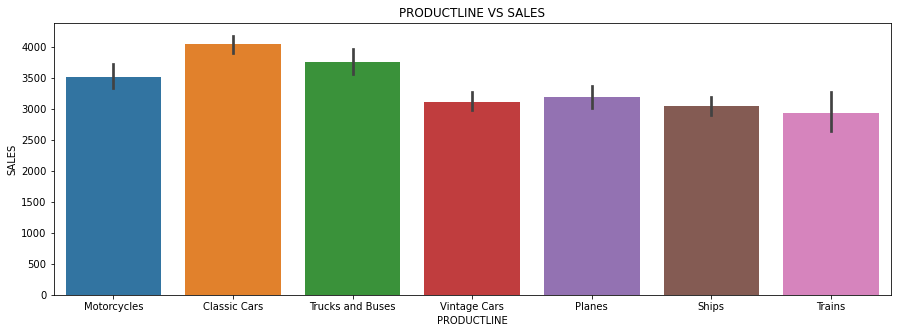

In [20]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='PRODUCTLINE', y='SALES',data=data)
plt.title("PRODUCTLINE VS SALES")

Text(0.5, 1.0, 'COUNTRY VS SALES')

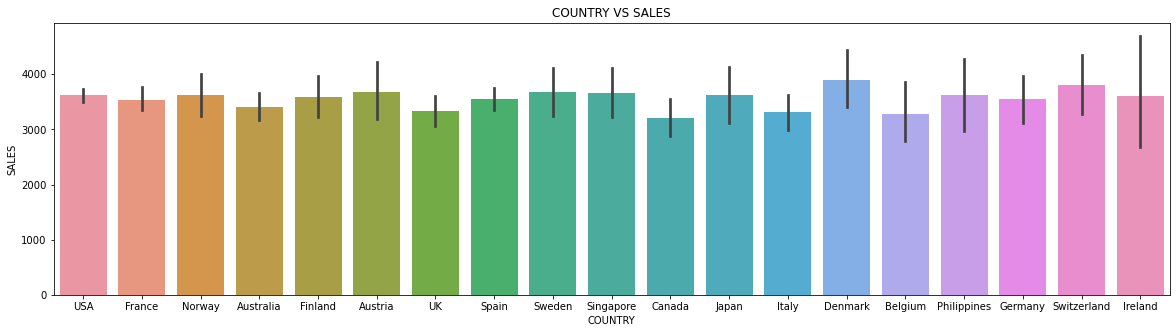

In [25]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='COUNTRY', y='SALES',data=data)
plt.title("COUNTRY VS SALES")

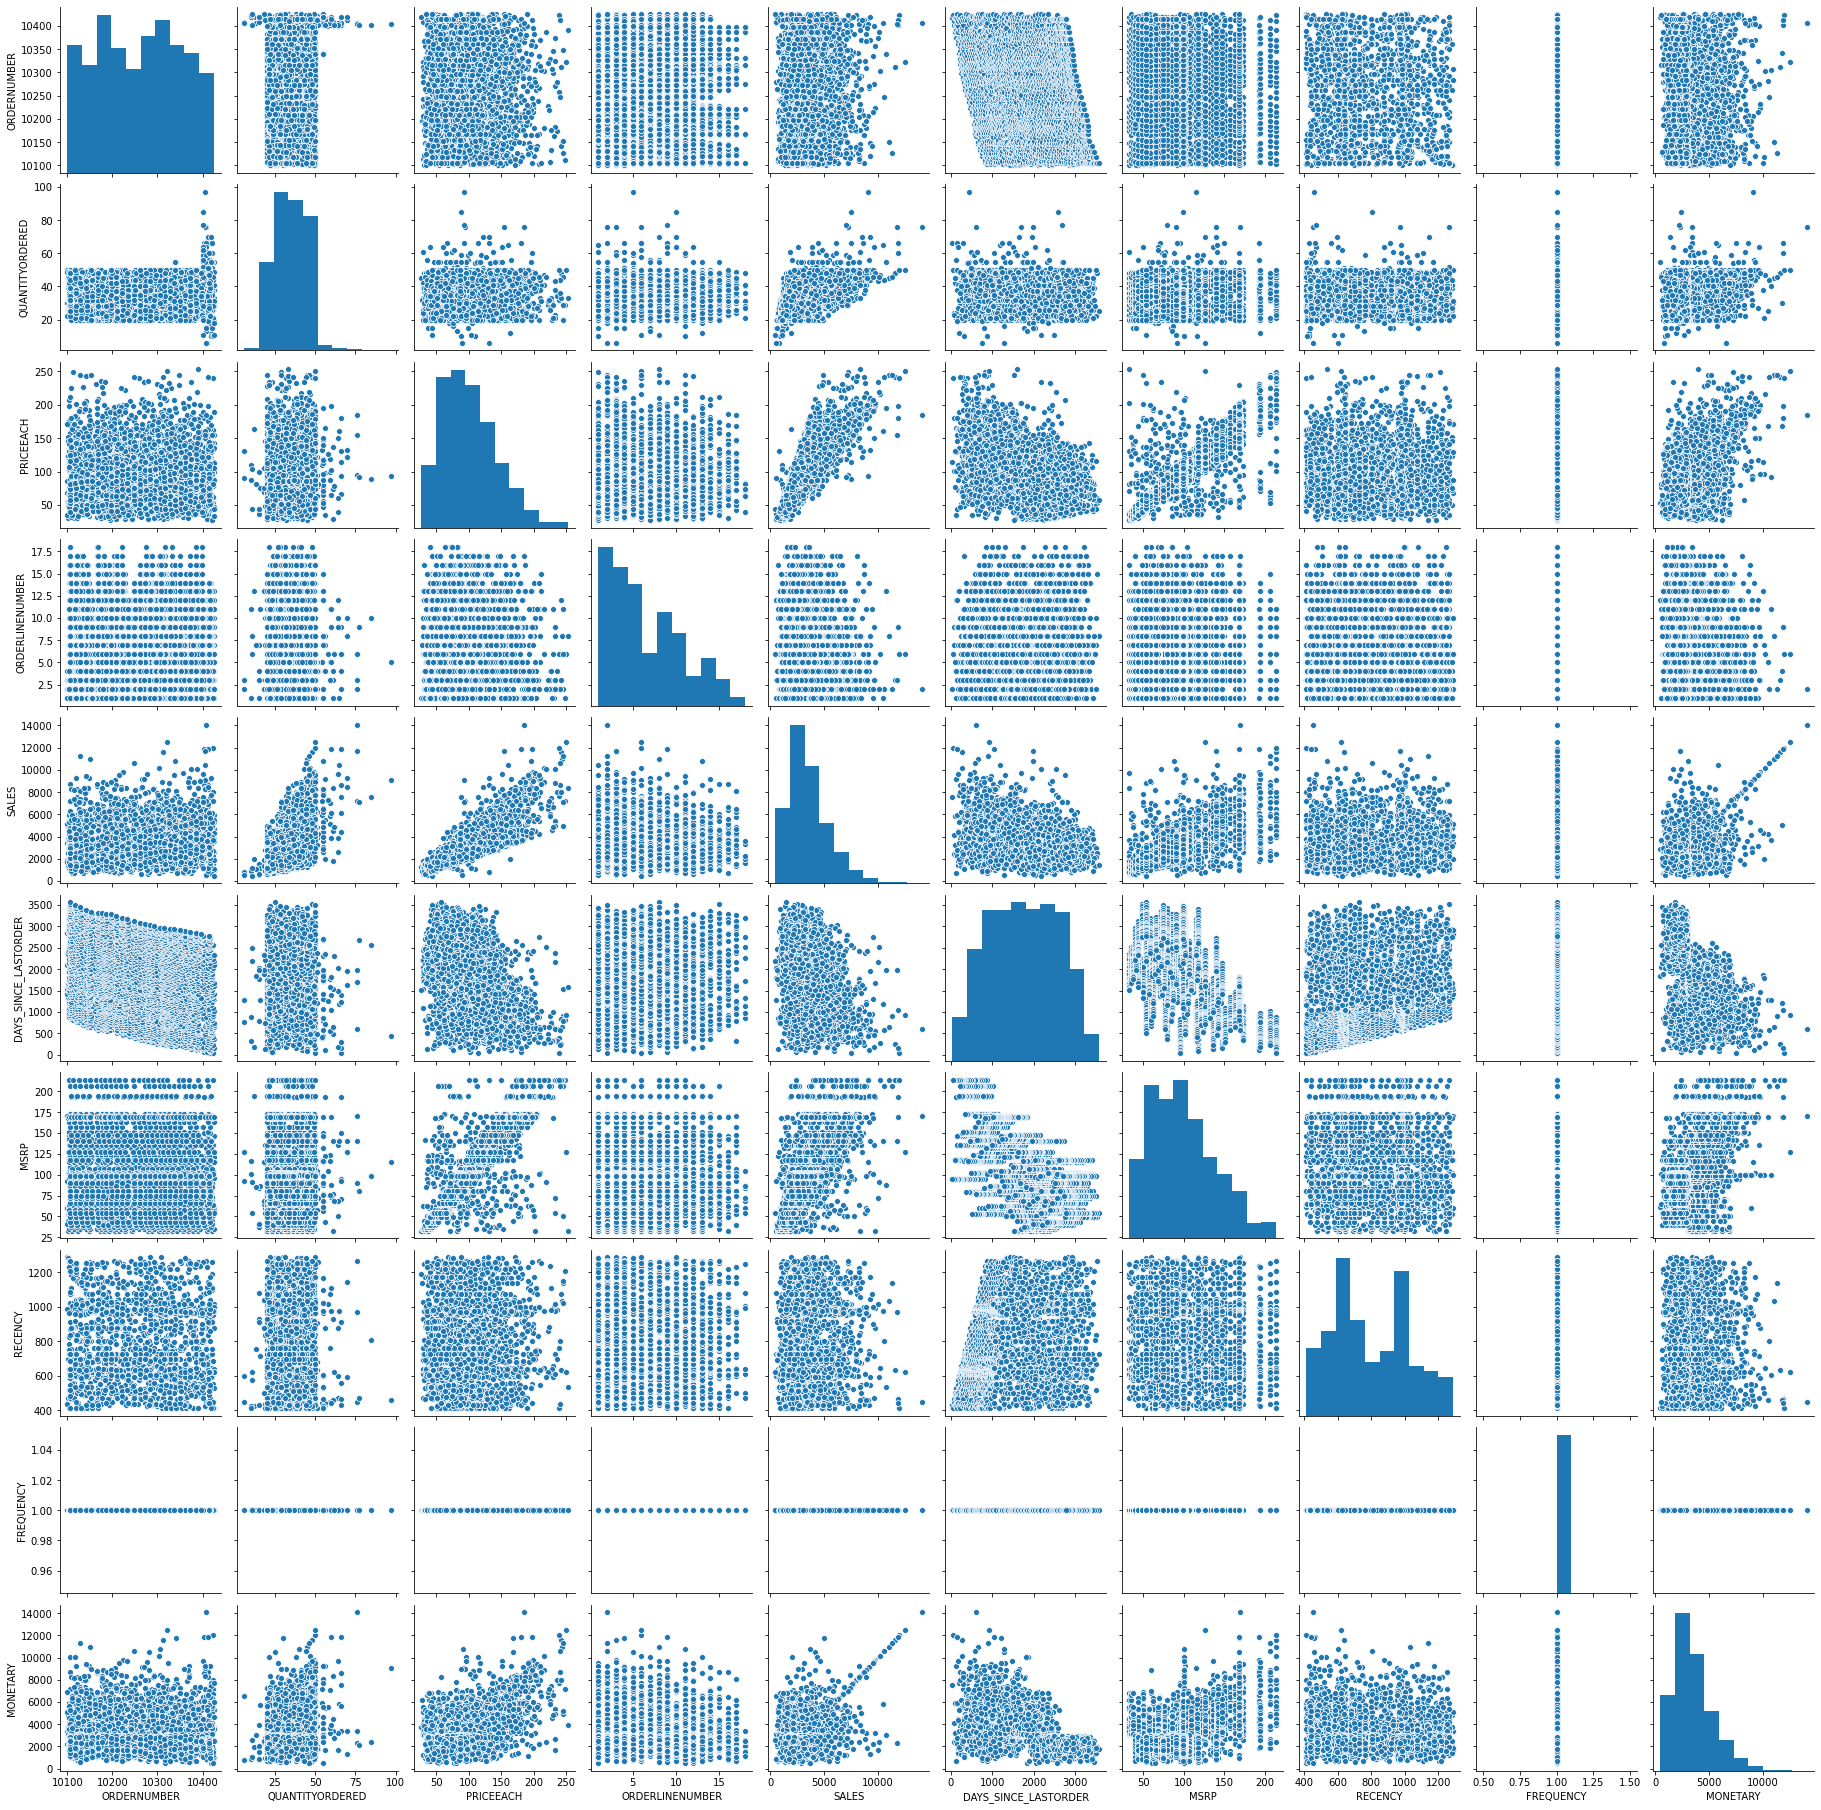

In [11]:
sns.pairplot(data)

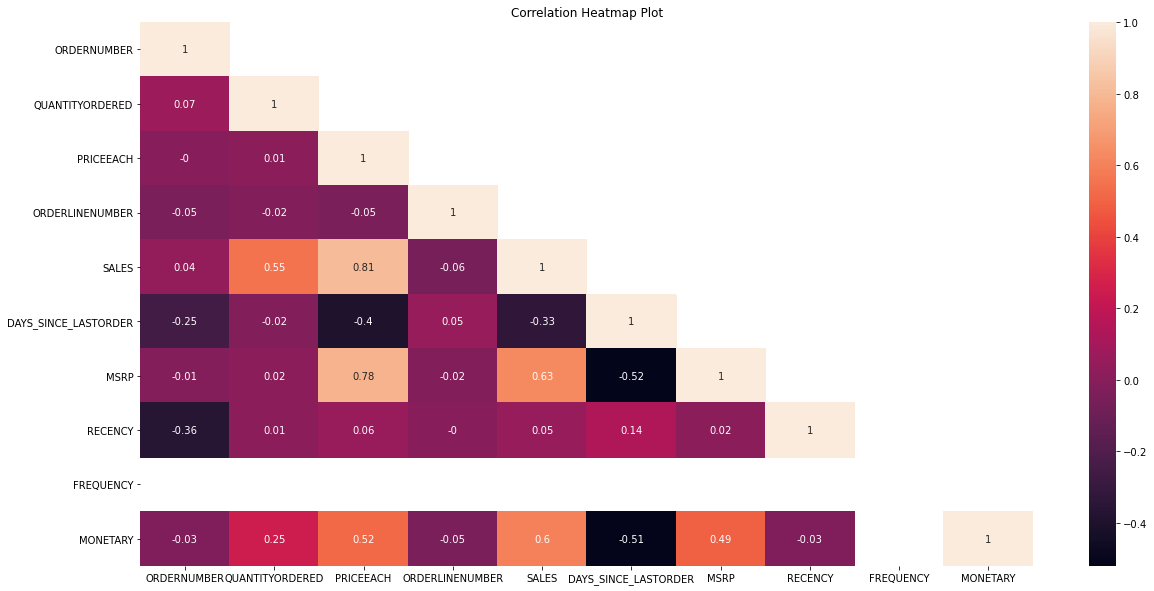

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(round(data.corr(),2), annot=True,mask=np.triu(data.corr(),+1));
plt.title('Correlation Heatmap Plot')
plt.show()

In [8]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'RECENCY', 'FREQUENCY', 'MONETARY'],
      dtype='object')

In [9]:
# Dropping Unnecessary columns 
temp=['ADDRESSLINE1','POSTALCODE', 'PHONE', 'CITY' , 'CONTACTFIRSTNAME', 'CONTACTLASTNAME' ]
data.drop(temp,axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  COUNTRY               2747 non-null   object        
 13  DEALSIZE          

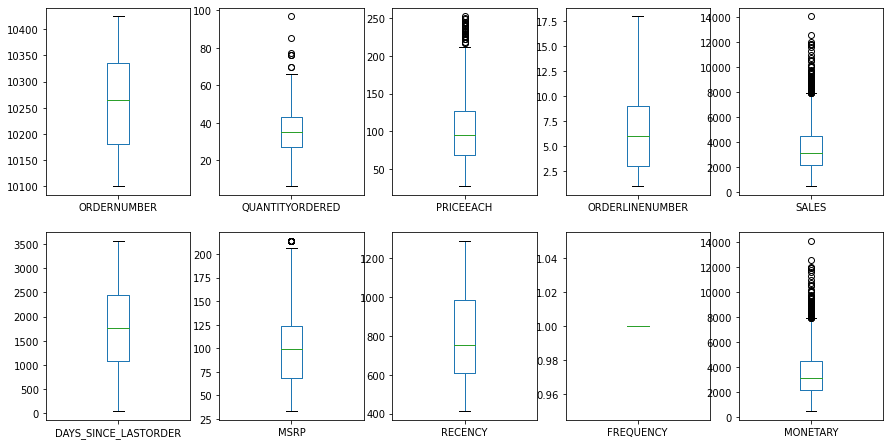

In [11]:
plt.rcParams['figure.figsize'] = [15,20]
data.plot(kind="box",subplots=True,layout=(5,5))
plt.title("Boxplot of data")
plt.show()

## RFM Analysis

#### For RFM analysis, we need only three columns. 'CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE' and 'SALES'

In [12]:
rfm_cols=['CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE', 'SALES']
RFM_data=data[rfm_cols]
RFM_data.head()

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2018-02-24,2871.00
1,Reims Collectables,10121,2018-05-07,2765.90
2,Lyon Souveniers,10134,2018-07-01,3884.34
3,Toys4GrownUps.com,10145,2018-08-25,3746.70
4,Technics Stores Inc.,10168,2018-10-28,3479.76


In [13]:
RFM_data.shape

(2747, 4)

In [14]:
RFM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CUSTOMERNAME  2747 non-null   object        
 1   ORDERNUMBER   2747 non-null   int64         
 2   ORDERDATE     2747 non-null   datetime64[ns]
 3   SALES         2747 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 86.0+ KB


In [15]:
RFM_data['ORDERDATE'] = pd.to_datetime(RFM_data['ORDERDATE'])

<ipython-input-15-95a801bacf7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_data['ORDERDATE'] = pd.to_datetime(RFM_data['ORDERDATE'])


In [16]:
RFM_data['ORDERDATE'].max()

Timestamp('2020-05-31 00:00:00')

In [17]:
import datetime as dt
now = dt.datetime(2020,5,31)

In [18]:
RFM_TABLE=RFM_data.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (now - x.max()).days, # Recency
                                                'ORDERNUMBER': lambda x: len(x.unique()), # Frequency
                                                'SALES': lambda x: x.sum()})    # Monetary 




In [19]:
RFM_TABLE['ORDERDATE'] = RFM_TABLE['ORDERDATE'].astype(int)

In [20]:

RFM_TABLE.rename(columns={'ORDERDATE': 'recency', 
                         'ORDERNUMBER': 'frequency',
                         'SALES': 'monetary_value'}, inplace=True)

In [21]:
RFM_TABLE.head()

,recency,frequency,monetary_value
CUSTOMERNAME,,,
"AV Stores, Co.",196,3,157807.81
Alpha Cognac,64,3,70488.44
Amica Models & Co.,265,2,94117.26
"Anna's Decorations, Ltd",83,4,153996.13
Atelier graphique,188,3,24179.96


# RFM_GROUPING

In [22]:
quantiles = RFM_TABLE.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,75.0,2.0,70488.44
0.50,184.0,3.0,87489.23
0.75,230.0,3.0,120562.74


In [23]:
quantiles = quantiles.to_dict()
quantiles 

{'recency': {0.25: 75.0, 0.5: 184.0, 0.75: 230.0},
 'frequency': {0.25: 2.0, 0.5: 3.0, 0.75: 3.0},
 'monetary_value': {0.25: 70488.44, 0.5: 87489.23000000001, 0.75: 120562.74}}

# RFM SEGMENTATION

In [24]:
RFM_SEGMENT = RFM_TABLE.copy()

In [25]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [26]:
RFM_SEGMENT['R_Quartile'] = RFM_SEGMENT['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_SEGMENT['F_Quartile'] = RFM_SEGMENT['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_SEGMENT['M_Quartile'] = RFM_SEGMENT['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))

In [27]:
RFM_SEGMENT['RFMClass'] = RFM_SEGMENT.R_Quartile.map(str) \
                            + RFM_SEGMENT.F_Quartile.map(str) \
                            + RFM_SEGMENT.M_Quartile.map(str)

In [28]:
RFM_SEGMENT.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,3,157807.81,2,2,4,224
Alpha Cognac,64,3,70488.44,4,2,1,421
Amica Models & Co.,265,2,94117.26,1,1,3,113
"Anna's Decorations, Ltd",83,4,153996.13,3,4,4,344
Atelier graphique,188,3,24179.96,2,2,1,221


In [29]:
RFM_SEGMENT['RFMClass'].value_counts()

111    12
444     9
323     7
422     6
112     5
344     5
224     4
321     4
322     3
212     3
113     3
222     3
423     3
223     3
242     2
211     2
443     2
213     2
421     2
123     1
324     1
243     1
424     1
244     1
124     1
311     1
341     1
221     1
Name: RFMClass, dtype: int64

In [30]:
#Who are my best customers? (BY RFMClass = 444)
RFM_SEGMENT[RFM_SEGMENT['RFMClass']=='444'].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,0,26,912294.11,4,4,4,444
Mini Gifts Distributors Ltd.,2,17,654858.06,4,4,4,444
La Rochelle Gifts,0,4,180124.90,4,4,4,444
The Sharp Gifts Warehouse,39,4,160010.27,4,4,4,444
Souveniers And Things Co.,2,4,151570.98,4,4,4,444


In [31]:
#Which customers are at the verge of churning?
#Customers who's recency value is low

RFM_SEGMENT[RFM_SEGMENT['R_Quartile'] <= 2 ].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Land of Toys Inc.,198,4,164069.44,2,4,4,244
"AV Stores, Co.",196,3,157807.81,2,2,4,224
"Saveley & Henriot, Co.",456,3,142874.25,1,2,4,124
Rovelli Gifts,201,3,137955.72,2,2,4,224
Online Diecast Creations Co.,209,3,131685.30,2,2,4,224


In [32]:
#Who are lost customers?
#Customers who's recency, frequency as well as monetary values are low 

RFM_SEGMENT[RFM_SEGMENT['RFMClass']=='111'].sort_values('recency',ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
"Double Decker Gift Stores, Ltd",495,2,36019.04,1,1,1,111
West Coast Collectables Co.,488,2,46084.64,1,1,1,111
Signal Collectibles Ltd.,476,2,50218.51,1,1,1,111
Daedalus Designs Imports,465,2,69052.41,1,1,1,111
CAF Imports,439,2,49642.05,1,1,1,111


In [33]:
#Who are your loyal customers?
#Customers with high frequency value
RFM_SEGMENT[RFM_SEGMENT['F_Quartile'] >= 3 ].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,0,26,912294.11,4,4,4,444
Mini Gifts Distributors Ltd.,2,17,654858.06,4,4,4,444
"Australian Collectors, Co.",184,5,200995.41,3,4,4,344
Muscle Machine Inc,182,4,197736.94,3,4,4,344
La Rochelle Gifts,0,4,180124.90,4,4,4,444


In [34]:
print("Best Customers: ",len(RFM_SEGMENT[RFM_SEGMENT['RFMClass']=='444']))
print('Loyal Customers: ',len(RFM_SEGMENT[RFM_SEGMENT['F_Quartile']==4]))
print("Big Spenders: ",len(RFM_SEGMENT[RFM_SEGMENT['M_Quartile']==4]))
print('Almost Lost: ', len(RFM_SEGMENT[RFM_SEGMENT['RFMClass']=='244']))
print('Lost Customers: ',len(RFM_SEGMENT[RFM_SEGMENT['RFMClass']=='144']))
print('Lost Cheap Customers: ',len(RFM_SEGMENT[RFM_SEGMENT['RFMClass']=='111']))

Best Customers:  9
Loyal Customers:  21
Big Spenders:  22
Almost Lost:  1
Lost Customers:  0
Lost Cheap Customers:  12


In [35]:
RFM_SEGMENT.to_csv("RFM_SEGMENT.csv")

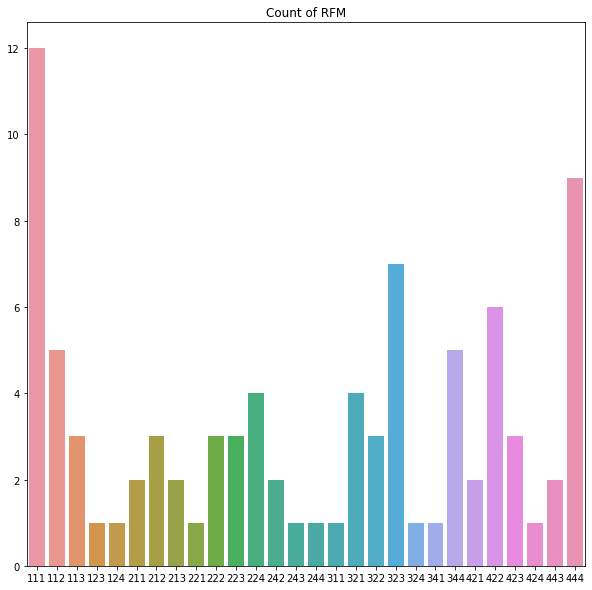

111    12
444     9
323     7
422     6
112     5
344     5
224     4
321     4
322     3
212     3
113     3
222     3
423     3
223     3
242     2
211     2
443     2
213     2
421     2
123     1
324     1
243     1
424     1
244     1
124     1
311     1
341     1
221     1
Name: RFMClass, dtype: int64


In [40]:
fig = plt.figure(figsize=(10,10))
sns.barplot(RFM_SEGMENT.RFMClass.value_counts().index,RFM_SEGMENT.RFMClass.value_counts().values)
plt.title("Count of RFM")
plt.show()
print(RFM_SEGMENT.RFMClass.value_counts())

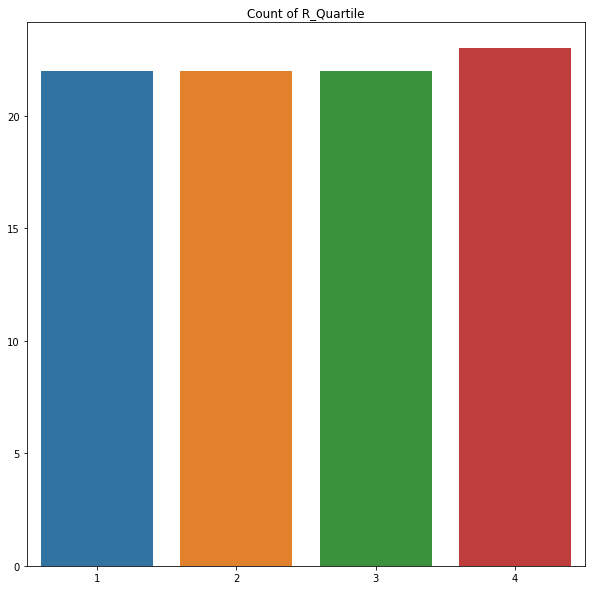

4    23
3    22
2    22
1    22
Name: R_Quartile, dtype: int64


In [42]:
fig = plt.figure(figsize=(10,10))
sns.barplot(RFM_SEGMENT.R_Quartile.value_counts().index,RFM_SEGMENT.R_Quartile.value_counts().values)
plt.title("Count of R_Quartile")
plt.show()
print(RFM_SEGMENT.R_Quartile.value_counts())

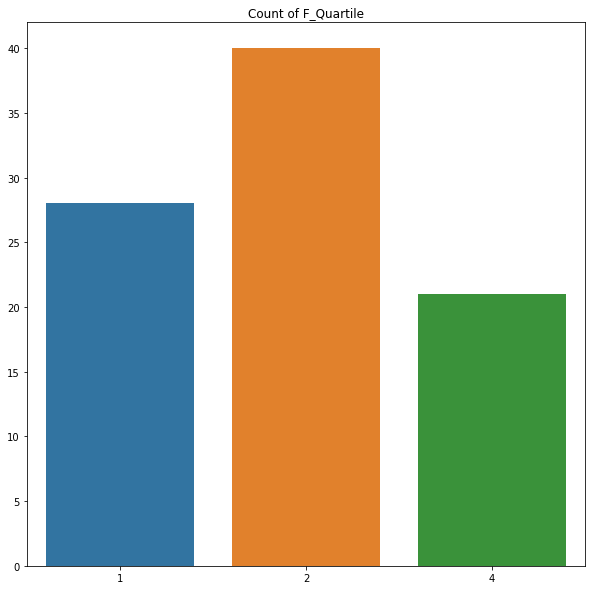

2    40
1    28
4    21
Name: F_Quartile, dtype: int64


In [43]:
fig = plt.figure(figsize=(10,10))
sns.barplot(RFM_SEGMENT.F_Quartile.value_counts().index,RFM_SEGMENT.F_Quartile.value_counts().values)
plt.title("Count of F_Quartile")
plt.show()
print(RFM_SEGMENT.F_Quartile.value_counts())

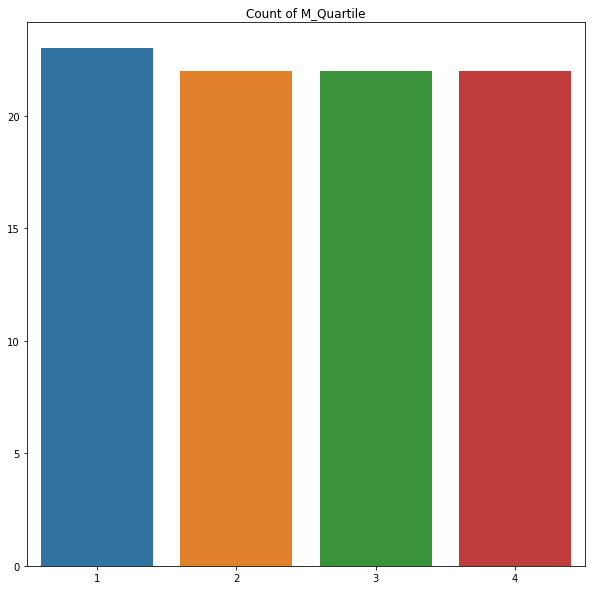

1    23
4    22
3    22
2    22
Name: M_Quartile, dtype: int64


In [45]:
fig = plt.figure(figsize=(10,10))
sns.barplot(RFM_SEGMENT.M_Quartile.value_counts().index,RFM_SEGMENT.M_Quartile.value_counts().values)
plt.title("Count of M_Quartile")
plt.show()
print(RFM_SEGMENT.M_Quartile.value_counts())